# <font color = 'orange'> Smote - Synthetic Minority Oversampling Technique

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address **imbalanced datasets where the minority class has significantly fewer instances** than the majority class.  
SMOTE involves generating synthetic instances of the minority class by **interpolating** between existing instances.  
* SMOTE will join 2 nearest data point with a line and then add data points on that line. 

---

In [1]:
from sklearn.datasets import make_classification 

In [2]:
# we are creating a sample of 1000 and with 2 features 1 cluster per each class with 0.9 majority with other class 
# n_redundent we don't need so 0 and random_state we can give the seed value
x,y = make_classification(n_samples = 1000,n_redundant = 0,n_features = 2, n_clusters_per_class = 1,
                   weights = [0.9],random_state = 12)

In [3]:
import pandas as pd 
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])

final_df = pd.concat([df1,df2],axis=1)
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [4]:
# weights = [0.9] is applied
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

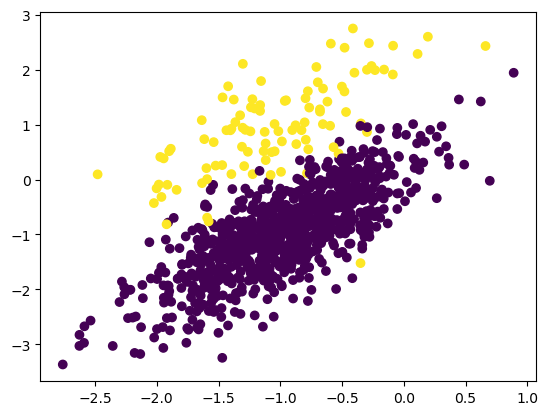

In [5]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])
# we can see the graph we have majority and minority dataset

---

Now, we will apply SMOTE to the imbalanced dataset

In [ ]:
!pip install imblearn

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
# transerform the dataset

oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [8]:
print(x.shape)
print(y.shape)

(1800, 2)
(1800,)


In [9]:
print('Number of 0 in the dataset :',len(y[y==0]))
print('Number of 1 in the dataset :',len(y[y==1]))

Number of 0 in the dataset : 900
Number of 1 in the dataset : 900


In [10]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1,df2],axis=1)

In [11]:
oversample_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.148916,0.647003,1
1796,-1.851742,-0.172893,1
1797,-0.890734,1.457771,1
1798,-1.316957,0.247140,1


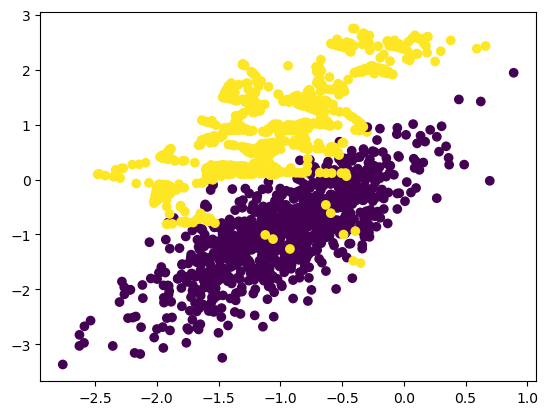

In [12]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])
# Now we can see that we get the balanced dataset
# all dots are connected

---